# Introduction

Clustering offers a "birds-eye view" of the data in the collections. Instead of finding individual objects through searching & filtering, you instead see the aggregated counts for each facet (material, technique, style, etc) of the object records matching on your query (taking all the same parameters available to search & filter, although some are not applicable). This is useful for exploring the data, giving a sense of the scale of different aspects of the collection, and is particularly useful for data visualisation.

Clustering can be carried out in full across all authority controlled fields (i.e. Facets), or, if you already have in mind a specific facet you are interested in (for example, wanting to find out which materials were most in use in Venice in the 18th century, according to our object records), you can specify the facet to return only those counts. 

The available cluster types are:
    
    * Material 
    * Technnique
    * Place
    * Person
    * Category
    * Collection
    * Event
    * Gallery
    * Object Type
    * Organisation
    * Style
    * Accession Year
 
There are two ways to request individual facets, one also returns the meta information about your query, the other just returns the terms. The example below show both in use.


{note}`
It should be noted the writer of this API documentation is a particular enthusiast for treemap data visualisations, but is willing to be convinced there are other ways to visualise cluster data, which may be even be better. Pull Requests welcome. XXX Link to Github repo for PRs`

## Cluster Specific API Parameters

As mentioned you can use all the normal parameters for a search or filter query to reduce your results down to a subset you are interested in. There are some extra parameters for clustering available as well:

  - cluster_size - Use this instead of page_size to specify the number of results (upto a max of 100)

```{note}
The following code is used to create the treemap visualisation using the Vega data visualisation library. Reveal if you want to see the details, send a pull request if you know a better way.
```

In [6]:
from IPython.display import display

def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

def treemap(clusters, cluster_name):
    
  clusters_json = [{"id": index+1, "name": "%s (%s)" % (x["value"], x["count"]), "parent": '0', "value": x["count"]} for index, x in enumerate(clusters)]
  clusters_json.insert(0, {"id": 0, "value": 0, "name": cluster_name})
    
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 1200,
  "height": 800,
  "padding": 2.5,
  "autosize": "none",
  "data": [
    {
      "name": "tree",
      "values": clusters_json,
      "transform": [
        {
          "type": "stratify",
          "key": "id",
          "parentKey": "parent"
        },
        {
          "type": "treemap",
          "field": "value",
          "sort": {"field": "value", "order": "descending"},
          "round": True,
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.children" }]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.parent == 0" }]
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "name"},
      "range": [
        "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
        "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476",
        "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc",
        "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9"
      ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 10, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1.0]
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "name"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {
          "stroke": {"value": "#fff"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"},
          "href": {"value": "https://collections.vam.ac.uk/"}
        },
        "hover": {
          "fill": {"value": "green"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "leaves"},
      "interactive": False,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
)

## Cluster Types

In [ ]:
### Materials

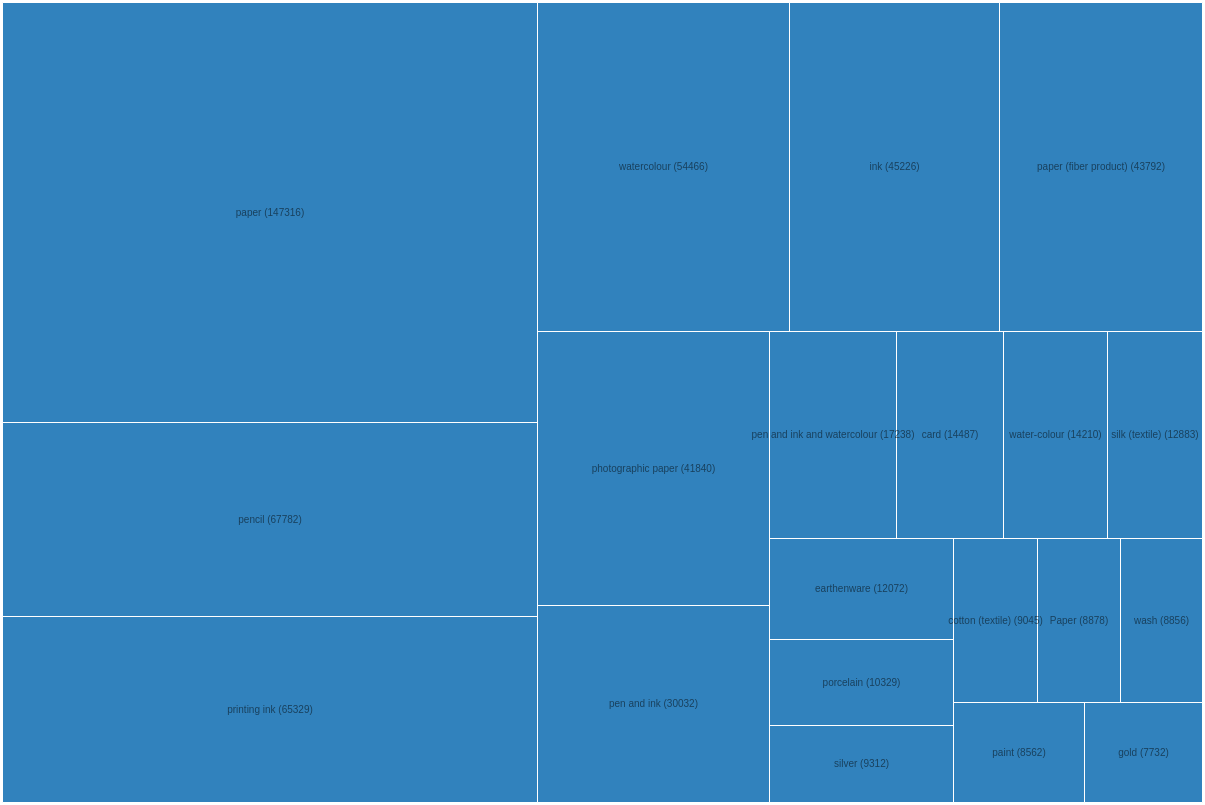

In [62]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/material/search')
object_clusters = req.json()
materials = object_clusters["terms"]
treemap(materials, "Materials")

### Techniques

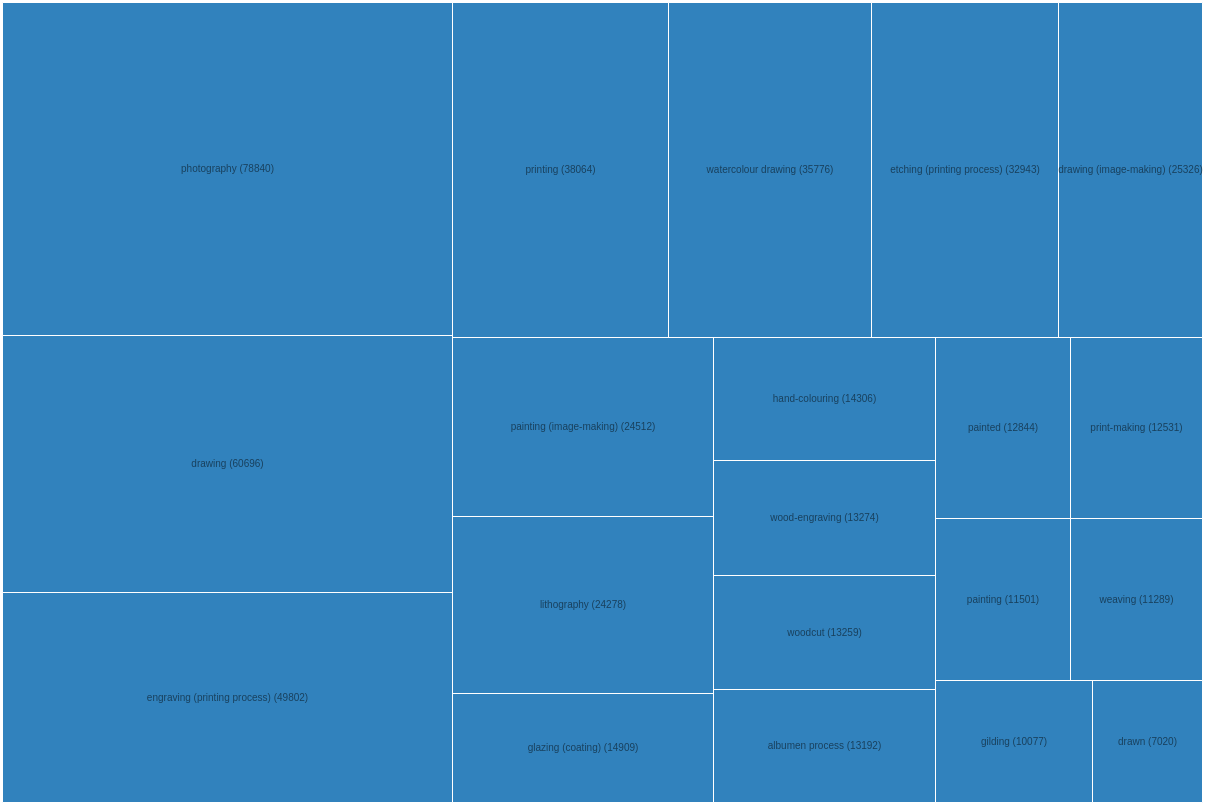

In [63]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/technique/search')
object_clusters= req.json()
techniques = object_clusters["terms"]
treemap(techniques, "Techniques")

### Person

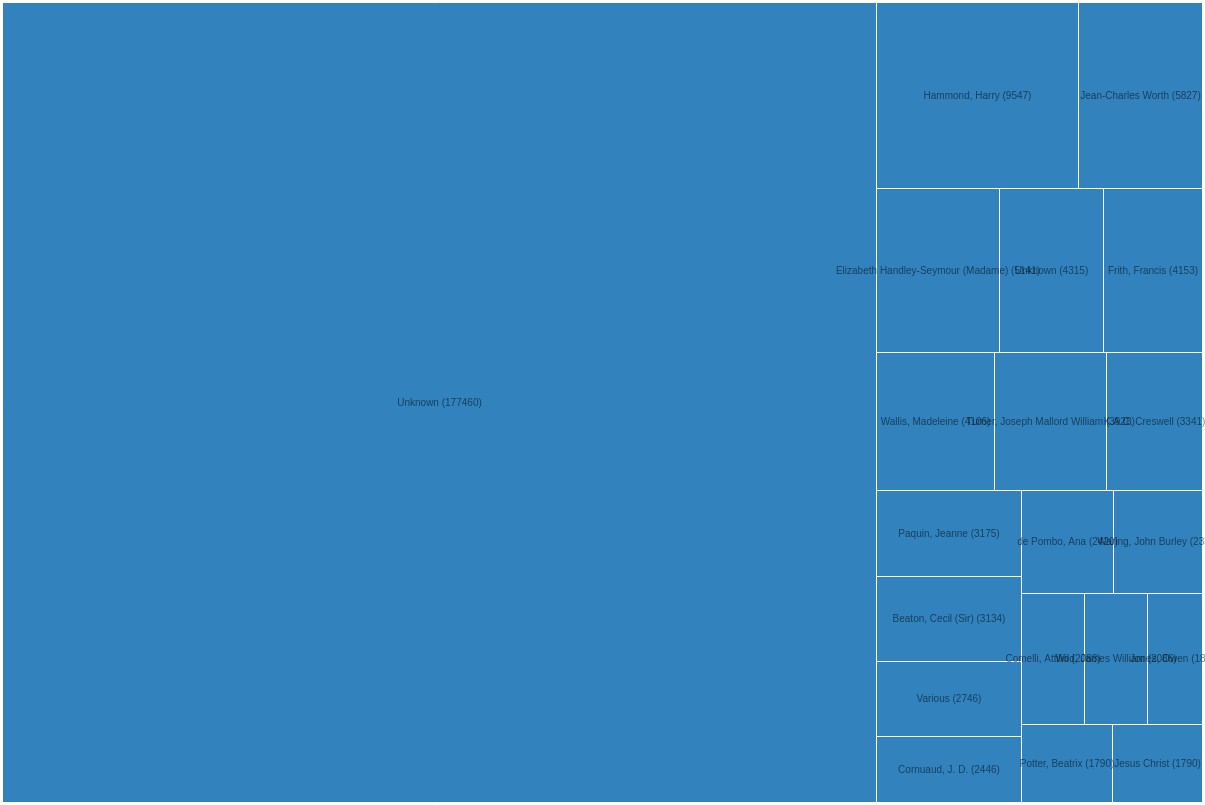

In [64]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/person/search')
object_clusters = req.json()
persons = object_clusters["terms"]
treemap(persons, "Person")

```{note}
Removing the very large 'Unknown' group is left as an exercise for the reader
```

### Category

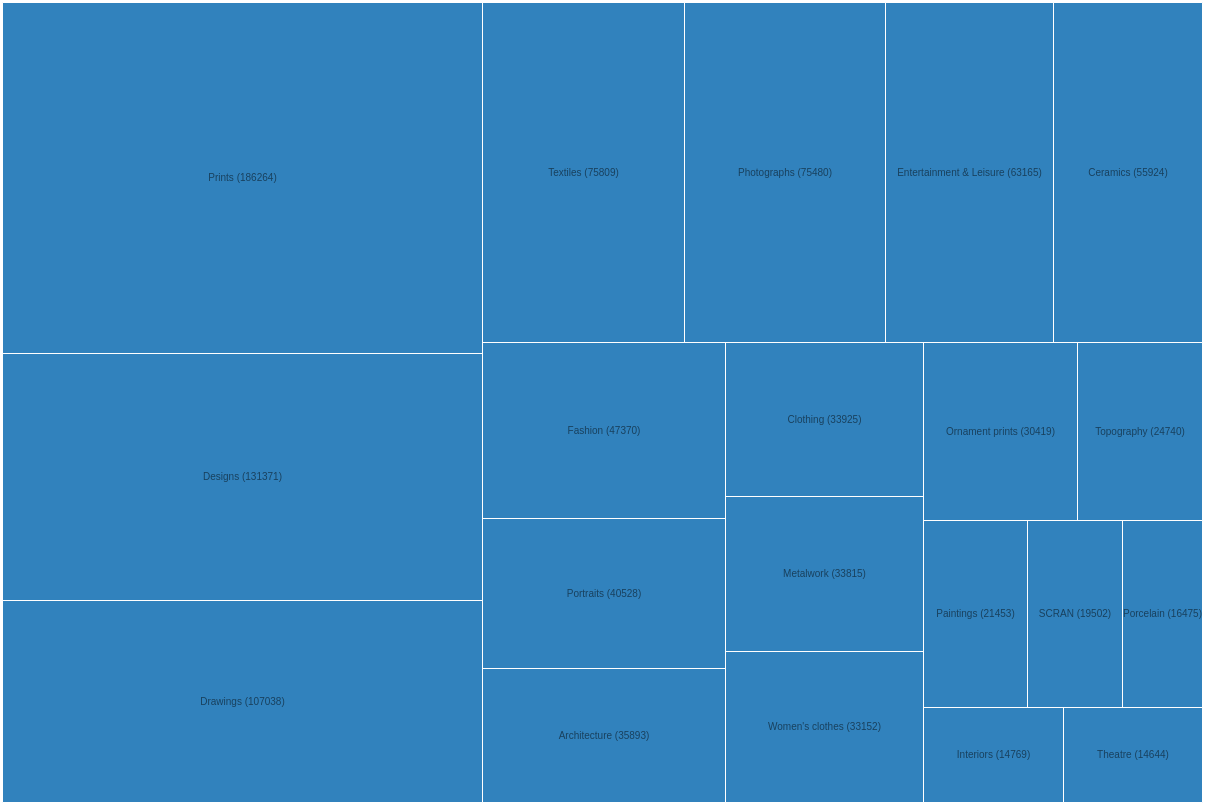

In [66]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/category/search')
object_clusters = req.json()
categories = object_clusters["terms"]
treemap(categories, "Category")

### Style

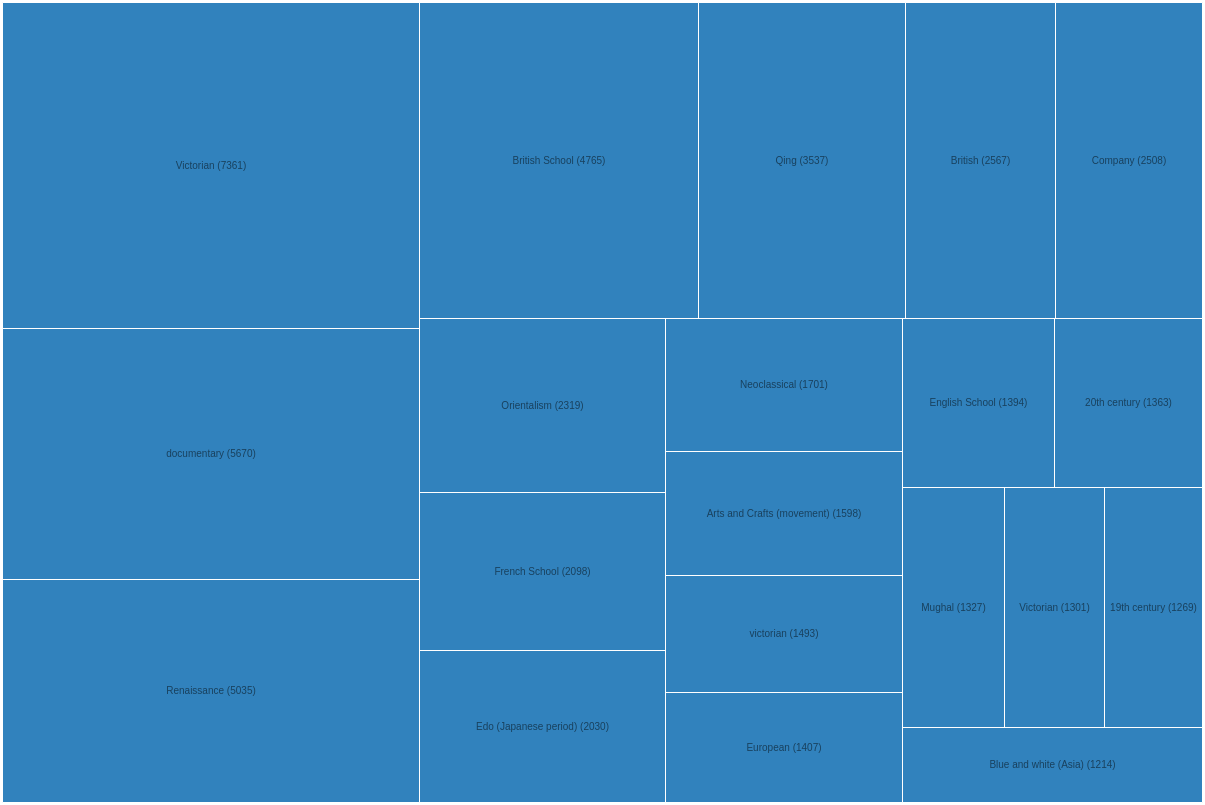

In [67]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/style/search')
object_clusters = req.json()
styles = object_clusters["terms"]
treemap(styles, "Style")

### Accessioned

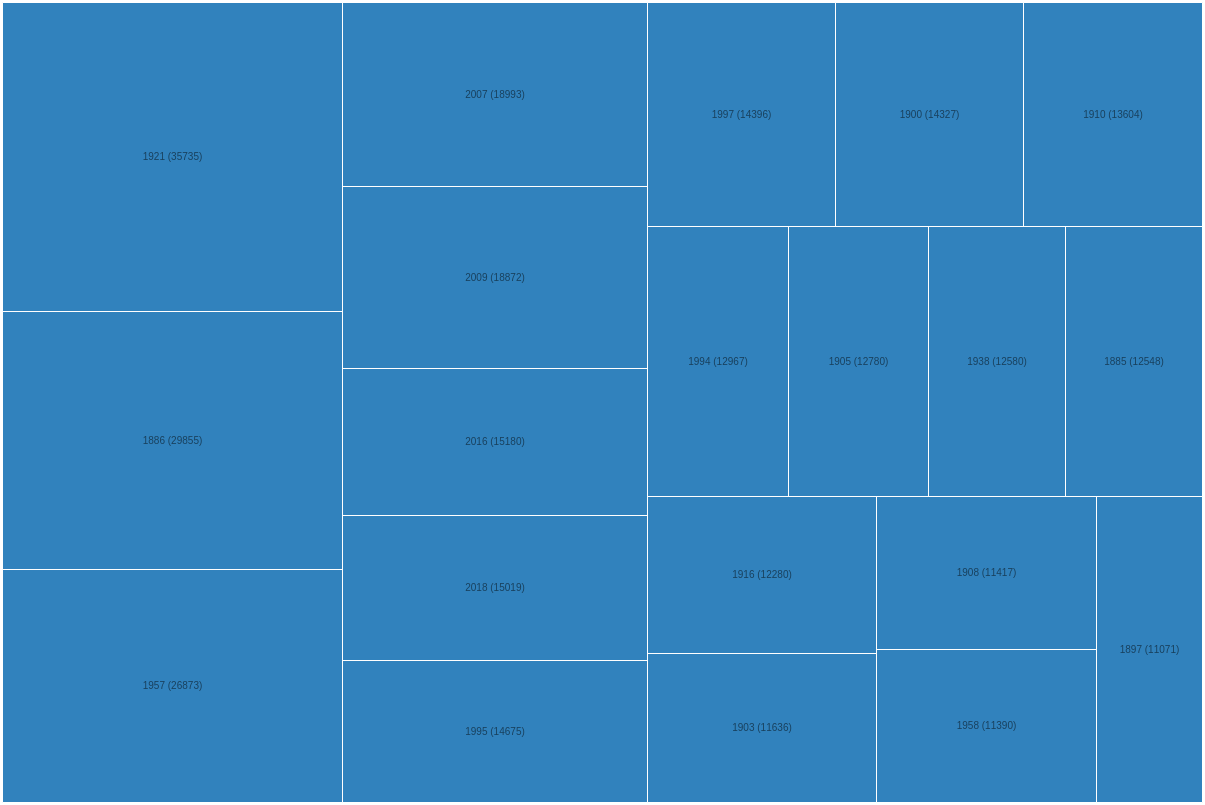

In [68]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/accession_year/search')
object_clusters = req.json()
accessioned = object_clusters["terms"]
treemap(accessioned, "Accession Year")

### Place

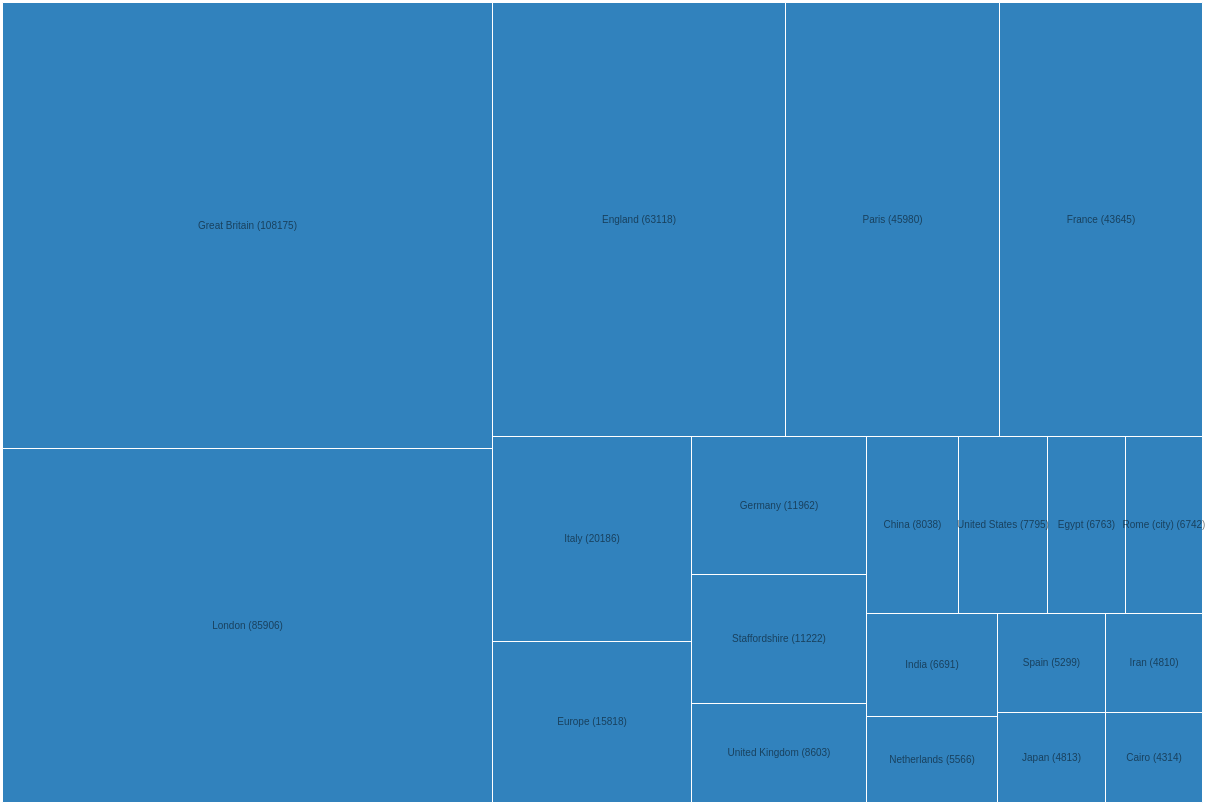

In [71]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/place/search')
object_clusters = req.json()
places = object_clusters["terms"]
treemap(places, "Place")

### Object Type

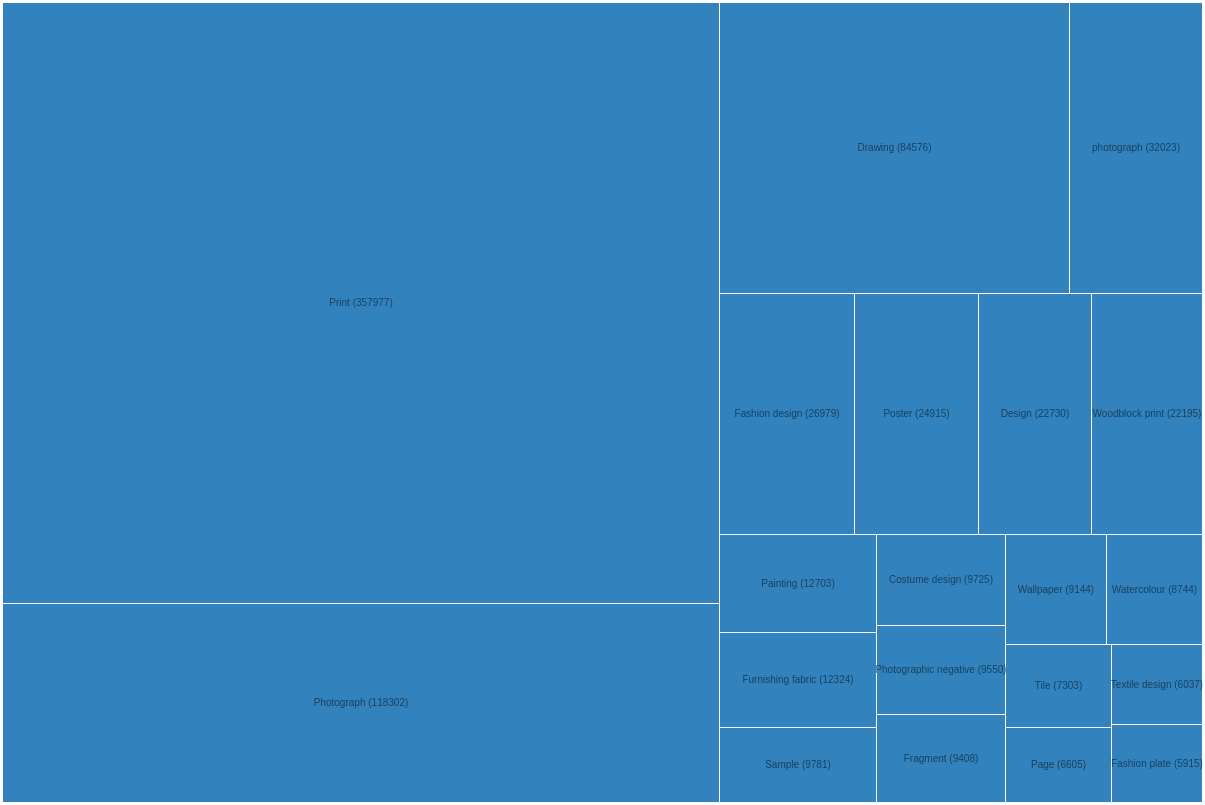

In [72]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/object_type/search')
object_clusters = req.json()
object_types = object_clusters["terms"]
treemap(object_types, "Object Type")

### Collection

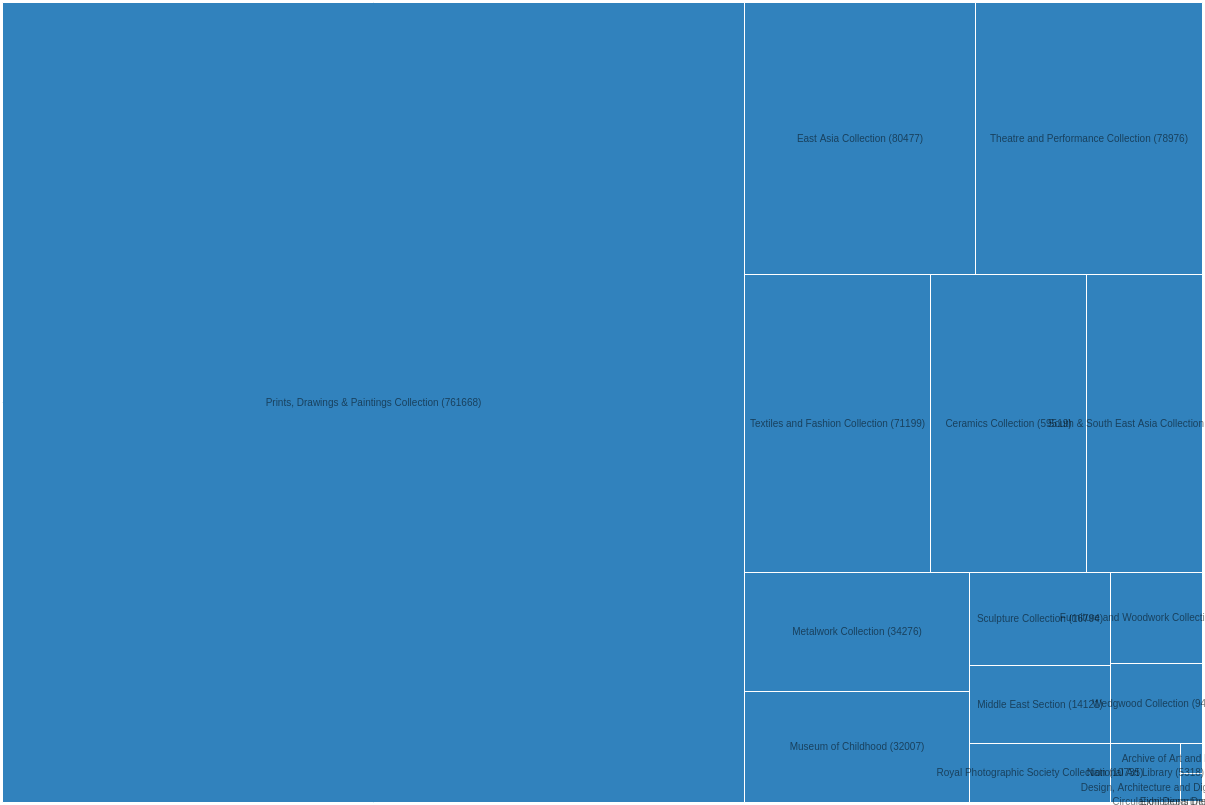

In [73]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/collection/search')
object_clusters = req.json()
collections = object_clusters["terms"]
treemap(collections, "Collection")

### Event

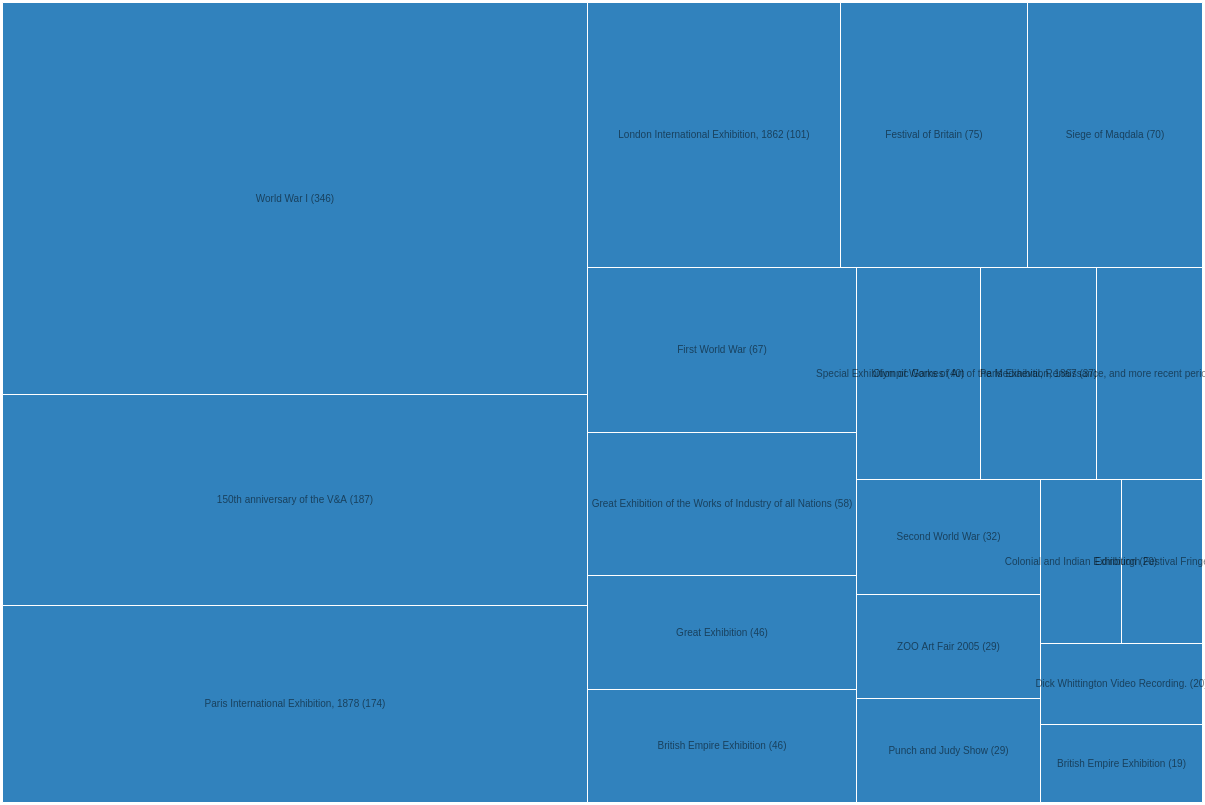

In [74]:
import requests
req = requests.get('https://api.vam.ac.ukv2/objects/clusters/event/search')
object_clusters = req.json()
events = object_clusters["terms"]
treemap(events, "Events")

### Gallery

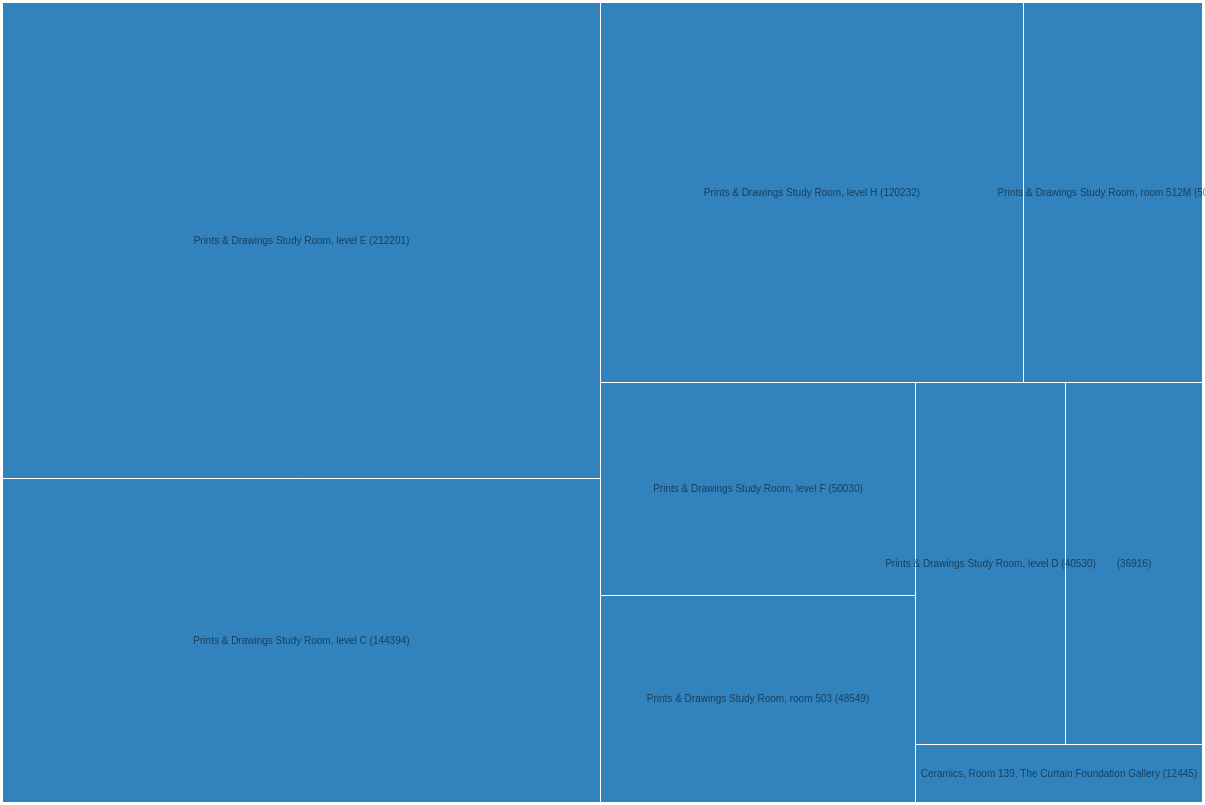

In [75]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/gallery/search')
object_clusters = req.json()
galleries = object_clusters["terms"]
treemap(galleries, "Gallery")

### Organisation

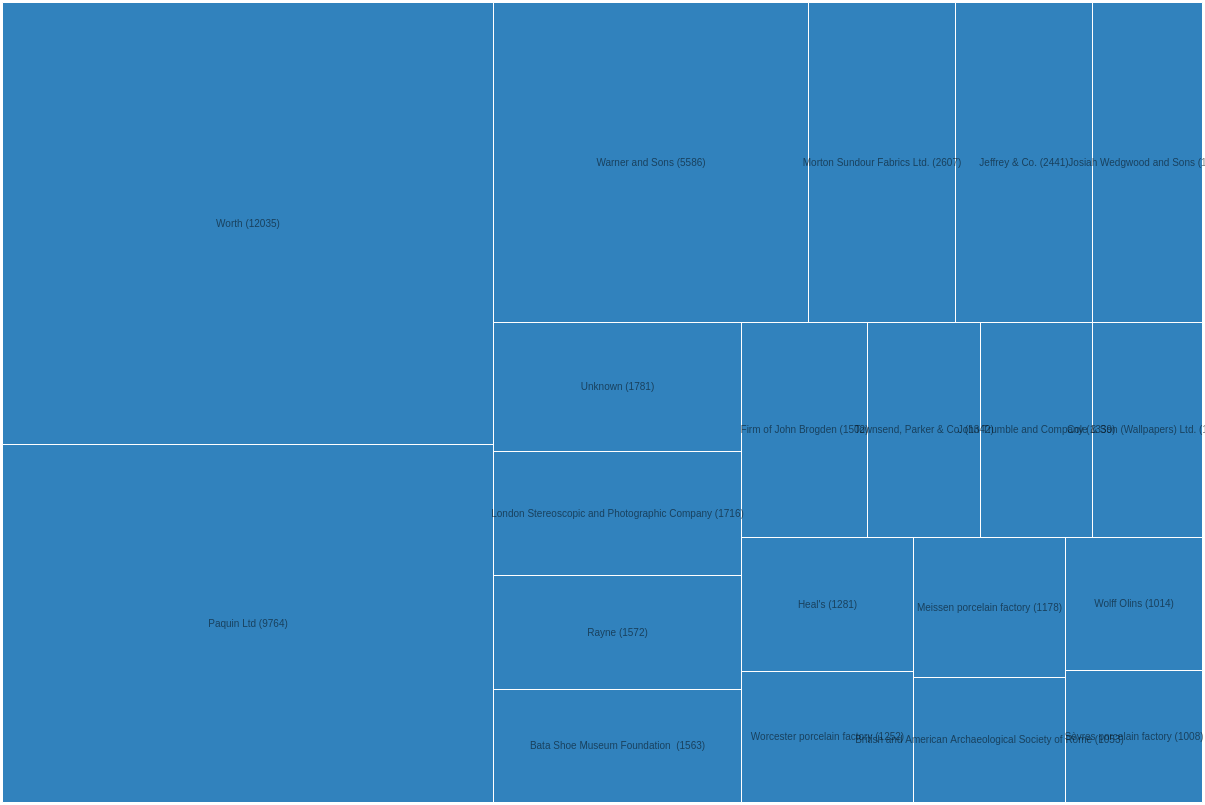

In [76]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/organisation/search')
object_clusters = req.json()
organisations = object_clusters["terms"]
treemap(organisations, "Organisation")

## Cluster Examples

### Materials used in Venice in the 18th century 

To return to the example at the start, let's see which materials are in use in objects from (or depicting or association with) Venice between 1700 and 1800

```{note}
At present the id_place parameter *cannot* be restricted to return objects "made in this place" only (so excluding depictions of the place, or associated with the place). This is a feature we will consider adding in future versions of the API.
```

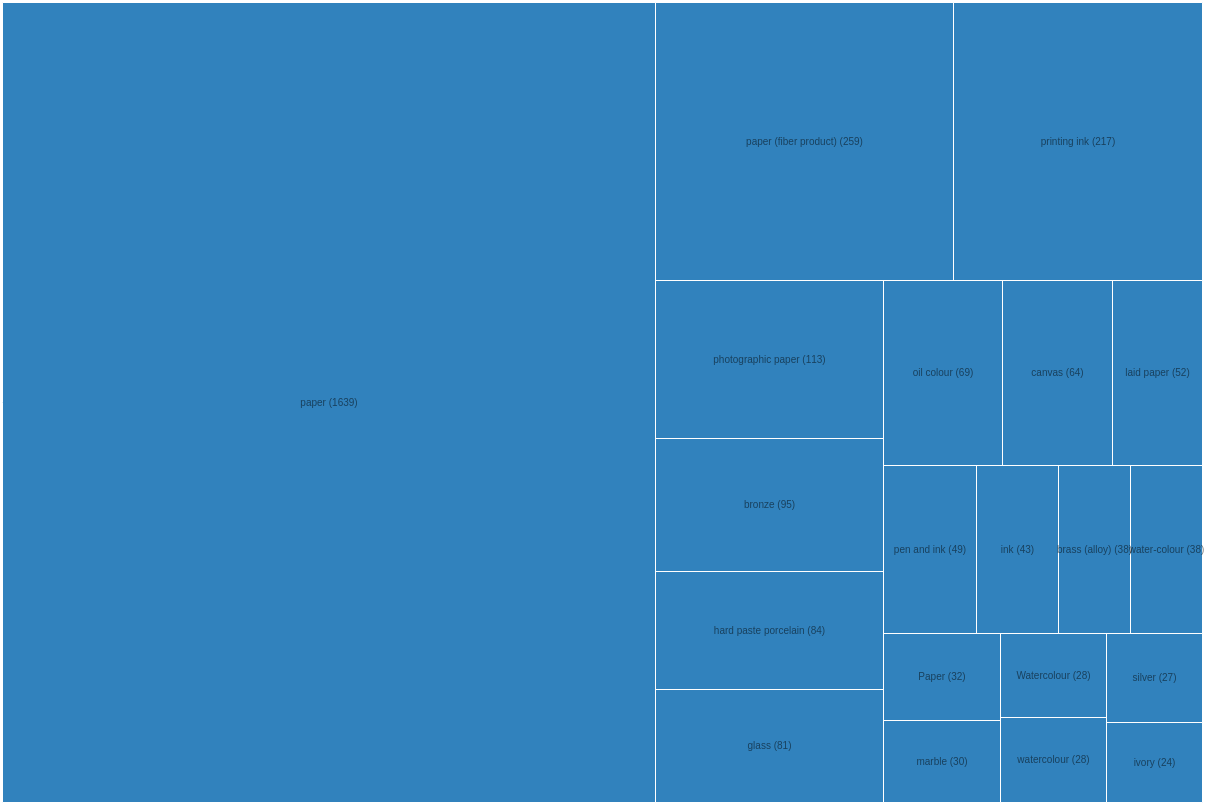

In [78]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/material/search?id_place=x29237&made_after_year=1700&made_before_year=1800')
object_clusters = req.json()
materials = object_clusters["terms"]
treemap(materials, "Materials")

### Objects containing plastic accessioned in the C20th

In [80]:
import requests
import altair as alt
import pandas as pd
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/accession_year/search?id_material=AAT14570&year_made_from=1900&year_made_to=1999&cluster_size=100')
object_clusters = req.json()
materials = object_clusters["terms"]
materials_df = pd.DataFrame(materials)

bars = alt.Chart(materials_df).mark_bar().encode(
    x='count:Q',
    y="value:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900, title="Objects containing plastic accessioned to the V&A in the C20th")

alt.LayerChart(...)

In [2]:
pip install vega_datasets

     |████████████████████████████████| 210 kB 5.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# DO NOT REMOVE This code is just here to force Jupyterbook to generate the diagrams as PNGs above. It's hidden from the output

import altair as alt
import plotly.express as px

data = px.data.iris()
data.head()

alt.Chart(data=data).mark_point().encode(
    x="sepal_width",
    y="sepal_length",
    color="species",
    size='sepal_length'
)

alt.Chart(...)